# Project Title: Stock Reactivity to COVID-19 Trends

# Team Members:
Aryan Ringshia - aryanrr

Neil Mankodi - nmankodi

# Data Sources
Dataset 1:
- Name: COVID-19 data from John Hopkins University
- Link: [John Hopkins University COVID-19 Dataset](https://www.kaggle.com/datasets/antgoldbloom/covid19-data-from-john-hopkins-university)
- Description: This dataset provides county-wise confirmed COVID-19 cases which allows us to track pandemic trends across various regions.

Dataset 2:
- Name: 2019-2024 US Stock Market Data
- Link: [US Stock Market Data](https://www.kaggle.com/datasets/saketk511/2019-2024-us-stock-market-data)
- Description: Kaggle's US Stock Market Data offers comprehensive information on stock prices.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder

# Data Imports

In [2]:
# Importing the stock market dataset
stock = pd.read_csv("/kaggle/input/2019-2024-us-stock-market-data/Stock Market Dataset.csv", index_col = 0)
# Display the first 5 rows of the dataset
stock.head()

,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,901.6,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,922.3,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,932.6,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,931.7,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,938.3,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0


In [3]:
# Importing the covid-19 dataset and dropping the first row since it contains county names
covid = pd.read_csv("/kaggle/input/covid19-data-from-john-hopkins-university/CONVENIENT_us_confirmed_cases.csv", low_memory=False).iloc[1:]
# Display the first 5 rows of the dataset
covid.head(5)

,Province_State,Alabama,Alabama.1,Alabama.2,Alabama.3,Alabama.4,Alabama.5,Alabama.6,Alabama.7,Alabama.8,...,Wyoming.15,Wyoming.16,Wyoming.17,Wyoming.18,Wyoming.19,Wyoming.20,Wyoming.21,Wyoming.22,Wyoming.23,Wyoming.24
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1/27/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Importing the covid-19 dataset and dropping the first row since it contains county names
deaths = pd.read_csv("/kaggle/input/covid19-data-from-john-hopkins-university/CONVENIENT_us_deaths.csv", low_memory=False).iloc[1:]
# Display the first 5 rows of the dataset
deaths.head(5)

,Province_State,Alabama,Alabama.1,Alabama.2,Alabama.3,Alabama.4,Alabama.5,Alabama.6,Alabama.7,Alabama.8,...,Wyoming.15,Wyoming.16,Wyoming.17,Wyoming.18,Wyoming.19,Wyoming.20,Wyoming.21,Wyoming.22,Wyoming.23,Wyoming.24
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1/27/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Description

List the variables of interest, the size of the data sets, missing values, etc.

Dataset 1: COVID-19 data from John Hopkins University
- Variables of Interest:
    - Date: Date of observation
    - Number of confirmed COVID-19 cases in each state within the United States.
    - Number of confirmed COVID-19 deaths in the United States.
- Size of the Dataset: This dataset contains 1142 rows (entries) and 3343 columns (variables).
- Missing Values: No missing values observed in the COVID dataset.

Dataset 2: 2019-2024 US Stock Market Data
- Variables of Interest:
    - Date: Date of stock market observation
    - Various Stock Features: Including prices and volumes for Natural Gas, Crude Oil, Copper, Bitcoin, Platinum, Ethereum, S&P 500, Nasdaq 100, Apple, Tesla, Microsoft, Silver, Google, Nvidia, Berkshire, Netflix, Amazon, Meta, Gold.
- Size of the Dataset: This dataset contains 1243 rows (entries) and 37 columns (variables).
- Missing Values: Platinum_Vol (607), Silver_Vol (47), Copper_Vol (37), Crude_oil_Vol (23), Natural_Gas_Vol (4), Gold_Vol (2), Nasdaq_100_Vol (1)


There are 772 common dates across both datasets, allowing for the alignment of COVID and stock market data for analysis.

# Preprocessing Data (80 points)

## Covid Cases Data Cleaning

In [5]:
# Renaming the 'Province_State' column to 'Date' and converting the 'Date' column to datetime64
covid.rename(columns={'Province_State': 'Date'}, inplace=True)
covid['Date'] = pd.to_datetime(covid['Date'], format="%m/%d/%y")

In [6]:
# Convert other columns to float
columns_to_convert = covid.columns.difference(['Date'])  
covid[columns_to_convert] = covid[columns_to_convert].astype(float)

In [7]:
# Function to merge and sum columns with the same state names
def merge_and_sum_columns(df):
    # Create a copy of the DataFrame to avoid modifying the original
    merged_df = df.copy()
    
    state_names = []
    # Extract state names from columns using regex and merge/sum columns
    for column in df.columns:
        state_name = re.match(r'^([A-Za-z\s]+)', column).group().strip()
        state_name += '_key'
        
        # Check if the state_key column already exists
        if state_name in merged_df.columns:
            merged_df[state_name] += df[column]  # Add the current column to the existing state_key column
        else:
            merged_df[state_name] = df[column]    # Create a new state_key column if it doesn't exist
    
    # Drop the original columns
    merged_df.drop(columns=df.columns, inplace=True)
    
    return merged_df

# Merge and sum columns with the same state names
covid = merge_and_sum_columns(covid)
# Rename the '_key' suffix in the column names
covid.columns = covid.columns.str.replace('_key', '')
covid.sample(5)

,Date,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
33,2020-02-24,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
341,2020-12-28,2269.0,130.0,0.0,10086.0,1651.0,37328.0,3160.0,8457.0,431.0,...,3540.0,15590.0,1716.0,91.0,0.0,2599.0,1953.0,726.0,1557.0,504.0
447,2021-04-13,1432.0,156.0,0.0,610.0,224.0,2676.0,1755.0,1118.0,210.0,...,1128.0,7279.0,358.0,97.0,0.0,2048.0,1104.0,328.0,1127.0,82.0
340,2020-12-27,2170.0,303.0,0.0,1296.0,908.0,33061.0,1581.0,0.0,584.0,...,3377.0,9677.0,796.0,63.0,0.0,3999.0,0.0,533.0,2558.0,54.0
851,2022-05-22,0.0,0.0,0.0,0.0,146.0,589.0,1087.0,0.0,0.0,...,722.0,3838.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Check for missing values
covid.isna().sum().sort_values(ascending=False)[:5]

Date             0
Pennsylvania     0
Nebraska         0
Nevada           0
New Hampshire    0
dtype: int64

In [9]:
# Check for duplicates
covid[covid.duplicated(subset=['Date'])]

,Date,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming


In [10]:
# Check for negative values in numerical columns
negative_values = covid.select_dtypes(include='number').lt(0).sum()

# Identify negative values to analyze context
negative_cases = covid.loc[:, covid.columns != 'Date'][covid.loc[:, covid.columns != 'Date'] < 0]
anomalous_data = covid[negative_cases.any(axis=1)]
anomalous_data.head()

,Date,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
49,2020-03-11,3.0,0.0,0.0,3.0,0.0,25.0,17.0,2.0,1.0,...,6.0,5.0,1.0,0.0,0.0,1.0,115.0,0.0,1.0,0.0
50,2020-03-12,1.0,0.0,0.0,0.0,0.0,43.0,15.0,2.0,0.0,...,9.0,6.0,0.0,1.0,0.0,3.0,160.0,0.0,4.0,1.0
53,2020-03-15,13.0,0.0,0.0,0.0,-9.0,39.0,33.0,1.0,0.0,...,0.0,4.0,8.0,0.0,0.0,0.0,-39.0,0.0,1.0,0.0
61,2020-03-23,44.0,13.0,0.0,83.0,27.0,376.0,128.0,88.0,12.0,...,221.0,121.0,95.0,23.0,1.0,34.0,224.0,0.0,44.0,0.0
67,2020-03-29,79.0,19.0,0.0,146.0,17.0,-2019.0,247.0,469.0,18.0,...,209.0,337.0,118.0,24.0,1.0,150.0,435.0,17.0,109.0,4.0


In [11]:
# Replace negative values with their absolute values
covid.loc[:, covid.columns != 'Date'] = covid.loc[:, covid.columns != 'Date'].abs()

### COVID Cases Data Cleaning Summary:

1. The original data has the covid cases on a county level but for the purposes of our analyses we need the data to be on a coarser granularity level. In order to make the data more accessible and easier to analyze, we aggregated the county data into state-wise data columns.
2. Renamed the 'Province_State' column to 'Date' and converted the 'Date' column to datetime64 format to ensure consistency.
3. Converted other columns to float datatype to ensure uniformity. 
4. Checked for missing values and confirmed none were present in the dataset.
5. Checked for duplicates in the dataset and found none.
6. Dealt with unrealistic negative values by replacing them with their absolute values, assuming that negative entries were likely due to data recording errors.


## Stock Data Cleaning

In [12]:
# Convert the 'Date' column to datetime64
stock['Date'] = pd.to_datetime(stock['Date'], format='%d-%m-%Y')

In [13]:
new_column_names = stock.columns.str.replace('.', '') # removing the dot from the column names to avoid any issues
stock.columns = new_column_names # assigning the new column names to the dataframe

In [14]:
columns_not_numeric_issue = stock.select_dtypes(include='object').columns

# Removing the comma and converting the column to float
for column in columns_not_numeric_issue:
    stock[column] = stock[column].str.replace(',', '').astype(float)

stock.select_dtypes(include='object').columns

Index([], dtype='object')

In [15]:
# checking for missing values
print(stock.isna().sum().sort_values(ascending=False)[:8])
columns_with_na = list(stock.isna().sum().sort_values(ascending=False)[:7].index)

Platinum_Vol       607
Silver_Vol          47
Copper_Vol          37
Crude_oil_Vol       23
Natural_Gas_Vol      4
Gold_Vol             2
Nasdaq_100_Vol       1
Meta_Vol             0
dtype: int64


In [16]:
# checking if deleting rows with missing values is a viable approach 
columns_for_dropna = ['Silver_Vol', 'Copper_Vol', 'Crude_oil_Vol', 'Natural_Gas_Vol', 'Gold_Vol', 'Nasdaq_100_Vol', 'Meta_Vol']
total_rows_before = len(stock)
stock_no_missing = stock.dropna(subset=columns_for_dropna)
total_rows_after = len(stock_no_missing)
percentage_lost = ((total_rows_before - total_rows_after) / total_rows_before) * 100
print(f"Percentage of data lost: {percentage_lost:.2f}%")

Percentage of data lost: 7.48%


In [17]:
# checking for duplicates
stock[stock.duplicated(subset=['Date'])]

,Date,Natural_Gas_Price,Natural_Gas_Vol,Crude_oil_Price,Crude_oil_Vol,Copper_Price,Copper_Vol,Bitcoin_Price,Bitcoin_Vol,Platinum_Price,...,Berkshire_Price,Berkshire_Vol,Netflix_Price,Netflix_Vol,Amazon_Price,Amazon_Vol,Meta_Price,Meta_Vol,Gold_Price,Gold_Vol


In [18]:
# Checking for unrealistic values
columns_with_negative_min = [col for col in stock.columns[1:] if stock[col].min() < 0]
columns_with_negative_min

['Crude_oil_Price']

In [19]:
stock[stock['Crude_oil_Price'] < 0]

,Date,Natural_Gas_Price,Natural_Gas_Vol,Crude_oil_Price,Crude_oil_Vol,Copper_Price,Copper_Vol,Bitcoin_Price,Bitcoin_Vol,Platinum_Price,...,Berkshire_Price,Berkshire_Vol,Netflix_Price,Netflix_Vol,Amazon_Price,Amazon_Vol,Meta_Price,Meta_Vol,Gold_Price,Gold_Vol
938,2020-04-20,1.924,229820.0,-37.63,247950.0,2.328,1260.0,6833.5,1260000.0,788.6,...,282800.0,720.0,437.49,12660000.0,119.68,115410000.0,178.24,16110000.0,1711.2,186910.0


In [20]:
def neighborhood_imputation_negative(df, column_to_replace, surrounding_rows=5) -> pd.DataFrame:
    """This function performs neighborhood mean imputation on a dataframe."""
    for index, value in df[df[column_to_replace] < 0].iterrows(): # iterating through the rows with negative values
        start_index = max(0, index - surrounding_rows) # getting the start index for the surrounding rows
        end_index = min(df.index.max(), index + surrounding_rows) # getting the end index for the surrounding rows
        surrounding_rows_data = df.loc[start_index:end_index, column_to_replace].drop(index) # getting the surrounding rows
        mean_of_surrounding_rows = surrounding_rows_data.mean() # calculating the mean of the surrounding rows
        df.at[index, column_to_replace] = mean_of_surrounding_rows # imputing the mean value
    return df

In [21]:
stock.loc[938-5:938+5, 'Crude_oil_Price'].drop(938).mean()

17.054

In [22]:
# imputing the negative value in the stock dataset
stock = neighborhood_imputation_negative(stock, 'Crude_oil_Price')

In [23]:
# rechecking for unrealistic values
columns_with_negative_min = [col for col in stock.columns[1:] if stock[col].min() < 0]
columns_with_negative_min

[]

In [24]:
columns_with_na

['Platinum_Vol',
 'Silver_Vol',
 'Copper_Vol',
 'Crude_oil_Vol',
 'Natural_Gas_Vol',
 'Gold_Vol',
 'Nasdaq_100_Vol']

In [25]:
# understanding how and where missing values are present
stock[stock['Copper_Vol'].isna()]

,Date,Natural_Gas_Price,Natural_Gas_Vol,Crude_oil_Price,Crude_oil_Vol,Copper_Price,Copper_Vol,Bitcoin_Price,Bitcoin_Vol,Platinum_Price,...,Berkshire_Price,Berkshire_Vol,Netflix_Price,Netflix_Vol,Amazon_Price,Amazon_Vol,Meta_Price,Meta_Vol,Gold_Price,Gold_Vol
0,2024-02-02,2.079,NaN,72.28,NaN,3.8215,NaN,43194.7,42650.0,901.6,...,589498.0,10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,2053.7,NaN
1,2024-02-01,2.050,161340.0,73.82,577940.0,3.8535,NaN,43081.4,47690.0,922.3,...,581600.0,9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,2071.1,260920.0
2,2024-01-31,2.100,142860.0,75.85,344490.0,3.9060,NaN,42580.5,56480.0,932.6,...,578020.0,9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,2067.4,238370.0
3,2024-01-30,2.077,139750.0,77.82,347240.0,3.9110,NaN,42946.2,55130.0,931.7,...,584680.0,9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,2050.9,214590.0
4,2024-01-29,2.490,3590.0,76.78,331930.0,3.8790,NaN,43299.8,45230.0,938.3,...,578800.0,13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,2034.9,1780.0
5,2024-01-26,2.712,73020.0,78.01,365460.0,3.8520,NaN,41811.3,69470.0,921.3,...,582300.0,10040.0,570.42,12770000.0,159.12,51050000.0,394.14,13160000.0,2026.6,410.0
6,2024-01-25,2.571,44980.0,77.36,320180.0,3.8690,NaN,39935.7,46300.0,894.5,...,576211.0,9350.0,562.00,9450000.0,157.75,43310000.0,393.18,15090000.0,2027.1,460.0
7,2024-01-24,2.641,65500.0,75.09,323730.0,3.8860,NaN,40086.0,58640.0,914.9,...,570977.0,9560.0,544.87,26350000.0,156.87,47640000.0,390.70,15700000.0,2025.4,800.0
8,2024-01-23,2.450,69160.0,74.37,306060.0,3.7935,NaN,39888.8,82670.0,905.5,...,564133.0,8640.0,492.19,14190000.0,156.02,34930000.0,385.20,15450000.0,2035.2,370.0
9,2024-01-22,2.419,121580.0,75.19,28910.0,3.7635,NaN,39556.4,85100.0,903.0,...,558316.0,11600.0,485.71,5210000.0,154.78,43690000.0,381.78,17490000.0,2031.5,330.0


In [26]:
columns_with_na.remove('Platinum_Vol')

In [27]:
columns_with_na

['Silver_Vol',
 'Copper_Vol',
 'Crude_oil_Vol',
 'Natural_Gas_Vol',
 'Gold_Vol',
 'Nasdaq_100_Vol']

In [28]:
def missing_imputation(df, column_name, nearest_count=5) -> pd.DataFrame:
    """This function performs neighborhood mean imputation on a DataFrame's missing values."""
    for i in range(len(df)): # iterating through the rows
        if pd.isnull(df.at[i, column_name]): # checking if the value is missing
            # getting the nearest values before the missing value that are not missing
            front_values = df[column_name].iloc[i-1::-1].dropna().head(nearest_count)

            # getting the nearest values after the missing value that are not missing
            back_values = df[column_name].iloc[i+1:].dropna().head(nearest_count)
            valid_values = pd.concat([front_values, back_values]) # combining the valid values
            if not valid_values.empty: # checking if there are valid values
                mean_value = valid_values.mean() # calculating the mean of the valid values
            else:
                mean_value = df[column_name].mean() # if there are no valid values, use the mean of the column
            df.at[i, column_name] = mean_value # imputing the mean value
    return df

In [29]:
# performing imputation on all columns with missing values
for column in columns_with_na:
    stock = missing_imputation(stock, column)

In [30]:
stock.drop(columns=['Platinum_Vol'], axis=1, inplace=True)

In [31]:
stock.isna().sum().sort_values(ascending=False)[:5]

Date               0
Microsoft_Price    0
Silver_Price       0
Silver_Vol         0
Google_Price       0
dtype: int64

### Summary of Stock Data Cleaning Process:
1. We dropped unnecessary columns like the "Unnamed: 0" from the DataFrame.
2. We converted the Date column (originally storing dates as a string) into the pandas DateTime format.
3. We cleaned the column names to make them easy to use via dot notation if needed downstream. This was done by removing the trailing period that occurs with trading volume columns.
4. We observed the current overview of the data with the help of the info functionality. This informed us that there are columns currently of the dtype object when they should actually be stored as a float. We reformatted these columns by replacing the comma with empty strings and then converting the dtype to float. Some of the columns that went through this process of reformatting were Bitcoin_Price, Platinum_Price, S&P_500_Price etc. 
5. We then explore missing values and perform a check to determine if directly dropping rows with NaN values is a suitable approach. It is not due to the significant data loss.
6. We check for duplicates to ensure that there are no such issues that can cause merging errors downstream.
7. We then deal with unrealistic values present in the DataFrame. In our case, the Crude_oil_Price has a negative value which is not possible. This issue is dealt with by perfoming a neighborhood mean imputation of the entries with such unrealistic values.
8. We then impute the missing values by using a slightly modified neighborhood mean imputation procedure. We observed that the missing values tend to bunch together making it difficult to directly pick up x entries on either side of the missing value to perform the imputation. We use a modified approach where the function will search for the nearest x non missing entries on either side of the current missing value and then use these to perform the imputation. This often will require the function to go beyond the nearest x values to actually find x non missing entries.
9. We then drop the column Platinum_Vol due to it having nearly 50% missing entries. The logic behind dropping it and not doing the above imputation was that imputing so many values would greatly bias any analysis we perform using the column. In pursuit of better quality analysis we made the decision to simply drop this column. The large number of columns and diverse features makes up for the loss of this one column.
10. We then create a new column that tracks the direction of movement of the S&P stock price. This categorical data will prove useful for indepth visualization and analysis in later sections.

## Covid Deaths Data Cleaning

In [32]:
# Renaming the 'Province_State' column to 'Date' and converting the 'Date' column to datetime64
deaths.rename(columns={'Province_State': 'Date'}, inplace=True)
deaths['Date'] = pd.to_datetime(deaths['Date'], format="%m/%d/%y")

# Convert other columns to float
columns_to_convert = deaths.columns.difference(['Date'])  
deaths[columns_to_convert] = deaths[columns_to_convert].astype(float)

# Summing up all rows except for the 'Date' column
total_deaths = deaths.drop(columns=['Date']).sum(axis=1)

# Concatenate the 'Date' column and the calculated 'Total Deaths' column
deaths = pd.concat([deaths['Date'], total_deaths], axis=1)

# Rename the new column
deaths.columns = ['Date', 'Total Deaths']

# Display the first 5 rows of the updated DataFrame
deaths.head(5)

,Date,Total Deaths
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0
5,2020-01-27,0.0


In [33]:
# Check for duplicates
deaths[deaths.duplicated(subset=['Date'])]

,Date,Total Deaths


In [34]:
# Replace negative values with their absolute values
deaths.loc[:, deaths.columns != 'Date'] = deaths.loc[:, deaths.columns != 'Date'].abs()

### Deaths Dataset Data Cleaning Summary:

- Dropped the first row since it contained county names.
- Renamed the 'Province_State' column to 'Date' and converted the 'Date' column to datetime64 format to ensure consistency.
- Converted other columns to float datatype to enable numerical computations and maintain consistency in data types.
- Calculated the total number of deaths by summing up all rows except for the 'Date' column, providing aggregated information.
- Checked for duplicates in the dataset and found none.
- Dealt with unrealistic negative values by replacing them with their absolute values, assuming that negative entries were likely due to data recording errors.

## Merging

In [35]:
# Merge the datasets using inner join
merged_df = pd.merge(stock, covid, on='Date', how='inner')
merged_df = pd.merge(merged_df, deaths, on='Date', how='inner')

merged_df.head()

,Date,Natural_Gas_Price,Natural_Gas_Vol,Crude_oil_Price,Crude_oil_Vol,Copper_Price,Copper_Vol,Bitcoin_Price,Bitcoin_Vol,Platinum_Price,...,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Total Deaths
0,2023-03-09,2.543,138150.0,75.72,349960.0,4.0390,54530.0,20361.8,468760.0,949.3,...,295.0,1493.0,0.0,15.0,0.0,0.0,0.0,708.0,0.0,590.0
1,2023-03-08,2.551,132610.0,76.66,335930.0,4.0270,79040.0,21710.8,316510.0,940.6,...,10634.0,0.0,1141.0,3.0,1.0,0.0,0.0,674.0,0.0,730.0
2,2023-03-07,2.687,149480.0,77.58,398240.0,3.9750,77400.0,22197.8,304750.0,936.3,...,567.0,0.0,0.0,3.0,4510.0,0.0,0.0,782.0,226.0,335.0
3,2023-03-06,2.572,246370.0,80.46,292350.0,4.0885,63750.0,22410.0,215310.0,978.6,...,359.0,0.0,0.0,12.0,0.0,0.0,0.0,1260.0,0.0,47.0
4,2023-03-03,3.009,185070.0,79.68,374200.0,4.0670,74569.0,22354.4,344630.0,979.4,...,552.0,0.0,0.0,1.0,0.0,0.0,1706.0,710.0,0.0,507.0


### Creating direction column for S&P 500 stock price

In [36]:
# creating a new column for the price direction of the S&P 500
merged_df['S&P_500_Price_Direction'] = \
    merged_df['S&P_500_Price'].diff().fillna(0).apply(lambda x: 'up' if x > 0 else 'down')

## Merged DataFrame - Data Description

In [37]:
# Display the shape of the merged DataFrame
merged_df.shape

(772, 97)

In [38]:
# Check for missing values
missing_values = merged_df.isna().sum()

# Print missing values
print("Missing Values:")
if missing_values.sum() == 0:
    print("No missing values found.")
else:
    print(missing_values)

Missing Values:
No missing values found.


In [39]:
# List of columns to drop
columns_to_drop = [col for col in merged_df.columns if col.endswith('_Price') or col.endswith('_Vol')]

# Drop the columns
merged_df.drop(columns=columns_to_drop, inplace=True)

merged_df.head()

,Date,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Total Deaths,S&P_500_Price_Direction
0,2023-03-09,0.0,0.0,0.0,0.0,261.0,8734.0,0.0,163.0,0.0,...,1493.0,0.0,15.0,0.0,0.0,0.0,708.0,0.0,590.0,down
1,2023-03-08,2471.0,0.0,0.0,3220.0,286.0,0.0,827.0,184.0,0.0,...,0.0,1141.0,3.0,1.0,0.0,0.0,674.0,0.0,730.0,up
2,2023-03-07,0.0,582.0,0.0,0.0,406.0,10786.0,0.0,154.0,0.0,...,0.0,0.0,3.0,4510.0,0.0,0.0,782.0,226.0,335.0,down
3,2023-03-06,0.0,0.0,0.0,0.0,83.0,0.0,553.0,82.0,0.0,...,0.0,0.0,12.0,0.0,0.0,0.0,1260.0,0.0,47.0,up
4,2023-03-03,0.0,0.0,0.0,0.0,252.0,2323.0,1689.0,190.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1706.0,710.0,0.0,507.0,down


### Preprocess Date Column

Extracting day, month, and year from the 'Date' column using pandas' datetime functionality facilitates temporal analysis

We encode date as cyclical features using sine and cosine transformations allow the model to capture the cyclical nature of time-related data effectively. Sine and cosine functions provide smooth, continuous representations of cyclical patterns, maintaining the periodicity of the data. This avoids the discontinuity that arises from using linear transformations. 

In [40]:
# Extracting day of year, month, and year
merged_df['Day'] = merged_df['Date'].dt.day
merged_df['Month'] = merged_df['Date'].dt.month
merged_df['Year'] = merged_df['Date'].dt.year

# Drop the 'Date' column in place
merged_df.drop('Date', axis=1, inplace=True)

In [41]:
def sin_transformer(period: int) -> FunctionTransformer:
    """
    Returns a transformer that applies sine transformation to the input.

    Parameters:
    period (int): The period for sine transformation.

    Returns:
    FunctionTransformer: A transformer that applies sine transformation.
    """
    return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))

def cos_transformer(period: int) -> FunctionTransformer:
    """
    Returns a transformer that applies cosine transformation to the input.

    Parameters:
    period (int): The period for cosine transformation.

    Returns:
    FunctionTransformer: A transformer that applies cosine transformation.
    """
    return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))

# Apply transformer
merged_df["Month_sin"] = sin_transformer(12).fit_transform(merged_df["Month"])
merged_df["Month_cos"] = cos_transformer(12).fit_transform(merged_df["Month"])

merged_df["Day_sin"] = sin_transformer(31).fit_transform(merged_df["Day"])
merged_df["Day_cos"] = cos_transformer(31).fit_transform(merged_df["Day"])

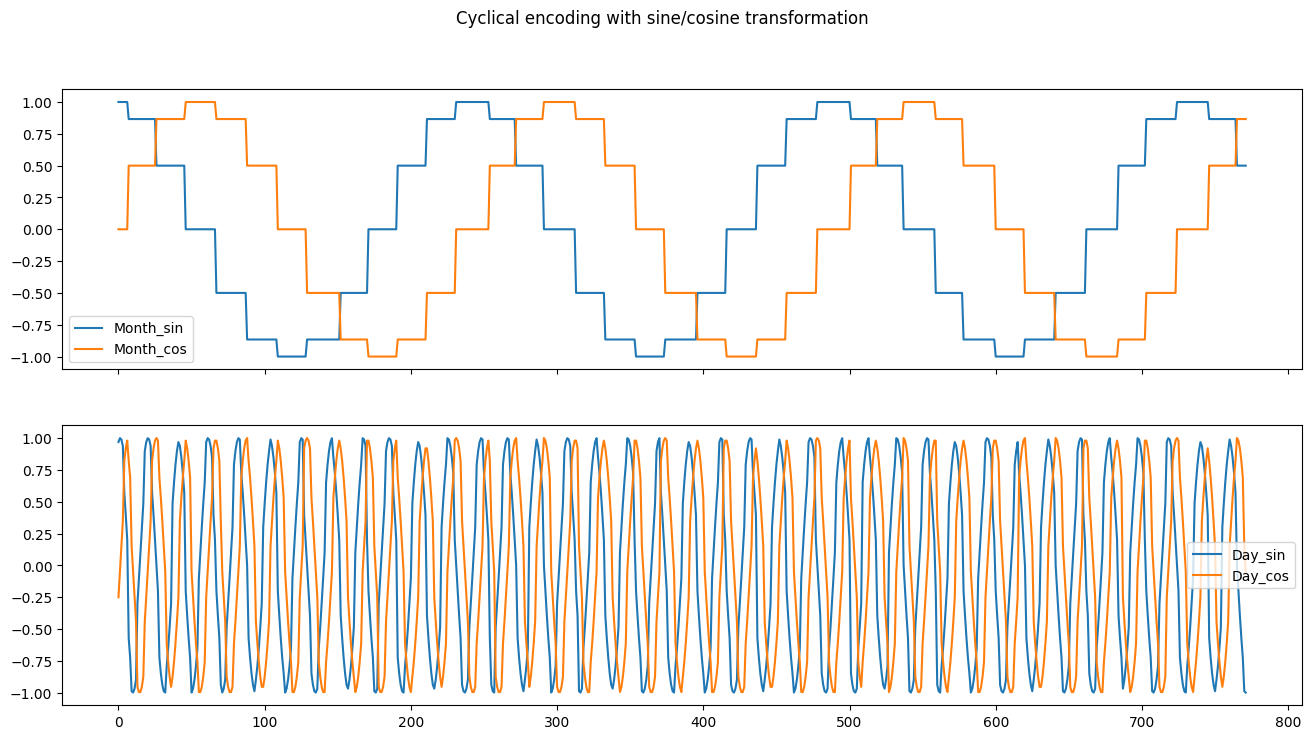

In [42]:
# Plotting cyclical encoding with sine/cosine transformation
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(16,8))
merged_df[["Month_sin", "Month_cos"]].plot(ax=ax[0])
merged_df[["Day_sin", "Day_cos"]].plot(ax=ax[1])
plt.suptitle("Cyclical encoding with sine/cosine transformation");

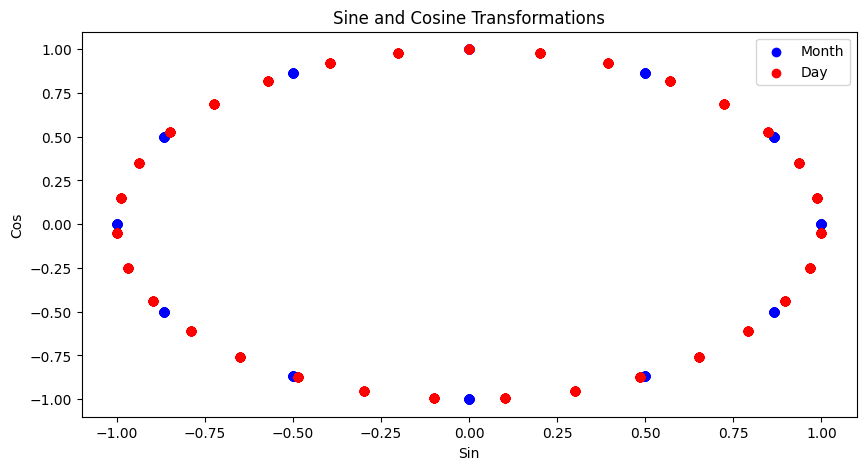

In [43]:
# Create scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(merged_df["Month_sin"], merged_df["Month_cos"], label='Month', color='blue')
plt.scatter(merged_df["Day_sin"], merged_df["Day_cos"], label='Day', color='red')
plt.xlabel('Sin')
plt.ylabel('Cos')
plt.title('Sine and Cosine Transformations')
plt.legend()
plt.show()

In [44]:
# Combine sine and cosine transformations
merged_df['Month'] = np.arctan2(merged_df['Month_sin'], merged_df['Month_cos'])
merged_df['Day'] = np.arctan2(merged_df['Day_sin'], merged_df['Day_cos'])

# Drop intermediate columns
merged_df.drop(columns=['Month_sin', 'Month_cos', 'Day_sin', 'Day_cos'], inplace=True)

### Principal Component Analysis (PCA) - Dimensionality Reduction

In [45]:
# Extract the data corresponding to the selected columns
data = merged_df[merged_df.columns[:58]]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply PCA
pca = PCA()
pca.fit(data_scaled)

# Print explained variance ratio
print("Explained variance ratio:")
print(pca.explained_variance_ratio_)

Explained variance ratio:
[4.88638551e-01 6.49312891e-02 4.48974855e-02 4.33672029e-02
 2.90251783e-02 2.50881186e-02 2.04731588e-02 1.93770747e-02
 1.87133693e-02 1.81282860e-02 1.78517213e-02 1.63783723e-02
 1.62997625e-02 1.31755963e-02 1.19704549e-02 1.11655593e-02
 1.07321014e-02 1.01580908e-02 9.14402036e-03 7.79183243e-03
 7.64397752e-03 6.54560162e-03 6.13793294e-03 5.76118768e-03
 5.39895929e-03 4.87659886e-03 4.71230927e-03 4.29841565e-03
 4.12981257e-03 3.80509056e-03 3.66313819e-03 3.49104571e-03
 3.30705309e-03 3.01048354e-03 2.80544125e-03 2.52576977e-03
 2.49609901e-03 2.30835852e-03 2.19180753e-03 2.13578752e-03
 1.94917193e-03 1.88394198e-03 1.78018499e-03 1.71008959e-03
 1.53586764e-03 1.48977465e-03 1.36013021e-03 1.24682604e-03
 1.20964841e-03 1.10190248e-03 1.04460293e-03 9.88872969e-04
 8.78378345e-04 7.60625901e-04 7.22742565e-04 7.07868136e-04
 6.03292257e-04 4.73982804e-04]


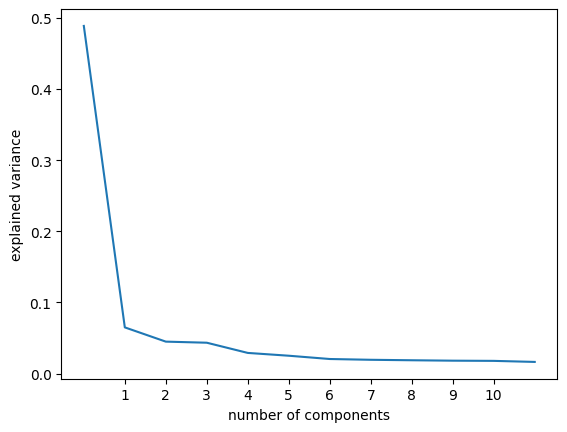

In [46]:
# Explained variance
plt.plot(pca.explained_variance_ratio_[:12])
plt.xlabel('number of components')
plt.xticks(np.arange(1, 11, 1)) 
plt.ylabel('explained variance')
plt.show()

Setting components = 4

In [47]:
pca = PCA(n_components=4)

data_pca = pca.fit_transform(data_scaled)

# Convert PCA results to DataFrame
pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4'])

# Concatenate PCA results with original merged_df
merged_df = pd.concat([merged_df, pca_df], axis=1)

# Drop columns corresponding to the states listed in all_states
merged_df.drop(columns=merged_df[merged_df.columns[:58]], inplace=True)

#### Summary: <br>
In this section we preprocess the data and prepare it for downstream classification modelling. The key steps and findings were as follows:
1. We start by reusing our preprocessing from previous parts of this project. This involved cleaning the three datasets we are working with, merging them, and transforming it to get it into a structure that aligns with our project goals.
2. Next we transformed the Date column by extracting the day, month, and year information and then making it cyclic by using sine and cosine. This will allow us to incorporate seasonality and temporal relations in our models.
3. We then performed dimensionality reduction on our state wise daily covid cases count data. For performing dimensionality reduction, we utilised PCA and used the explained variance ratio to determine the final number of components to retain. This allowed us to take our original 58 columns and bring it down to a very manageable 4 components that were able to explain a majority of the variance in the data.

In [48]:
# Rename S&P_500_Price_Direction as Direction
merged_df.rename(columns={'S&P_500_Price_Direction': 'Direction'}, inplace=True)

# Convert label values to numeric (1 and 0)
label_encoder = LabelEncoder()
merged_df['Direction'] = label_encoder.fit_transform(merged_df['Direction'])

### Train-Test Split

In [49]:
# Train-test split
X = merged_df.drop("Direction", axis=1)
y = merged_df["Direction"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standard scaling

Standardizing both the training and testing data separately ensures that they are transformed consistently and prevents data leakage from the testing set into the training set. 

In [50]:
# Standardize the training and testing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Clustering Analysis (100 points)

In this section we develop machine learning models to perform classification on our data to predict the direction of stock market movement. The keys details were as follows:
- Goal: Use covid cases, deaths and temporal details to predict whether the market will go up or down.
- Justification of Goal: Being able to predict how the market will move can be very useful in a number of ways. Some of which are as follows:
    1. Allows us to understand the impact of the pandemic on Market behavior.
    2. Allows us to develop a way to perform simulations that can predict how the market will move based on certain pandemic related conditions in the future.
    3. Allows decision makers to take proactive steps for risk management in the financial landscape.

#### Classifiers Used -

1. Random Forest Classifier
2. K-Nearest Neighbors (KNN)
3. Support Vector Classifier
4. XG Boost Classifier

In [51]:
# Define models and their parameter grids
models = {
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier()
}

param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    'KNN': {
        'n_neighbors': [3, 6, 9, 11],
        'weights': ['uniform', 'distance']
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'XGBoost': {
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'n_estimators': [100, 200, 300]
    }
}

In [52]:
# Results dictionary to store evaluation metrics
results = {}

for model_name, model in models.items():
    # GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_

    # Train model with best hyperparameters
    best_model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = best_model.predict(X_test_scaled)

    # Calculate evaluation metrics
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)

    # Store results
    results[model_name] = {
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'accuracy': accuracy,
        'params': grid_search.best_params_
    }

In [53]:
# Print best parameters of all models
for model_name in results.keys():
    print(f"Best parameters for {model_name}: {results[model_name]['params']}")

Best parameters for Random Forest: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best parameters for KNN: {'n_neighbors': 11, 'weights': 'uniform'}
Best parameters for SVM: {'C': 10, 'kernel': 'rbf'}
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


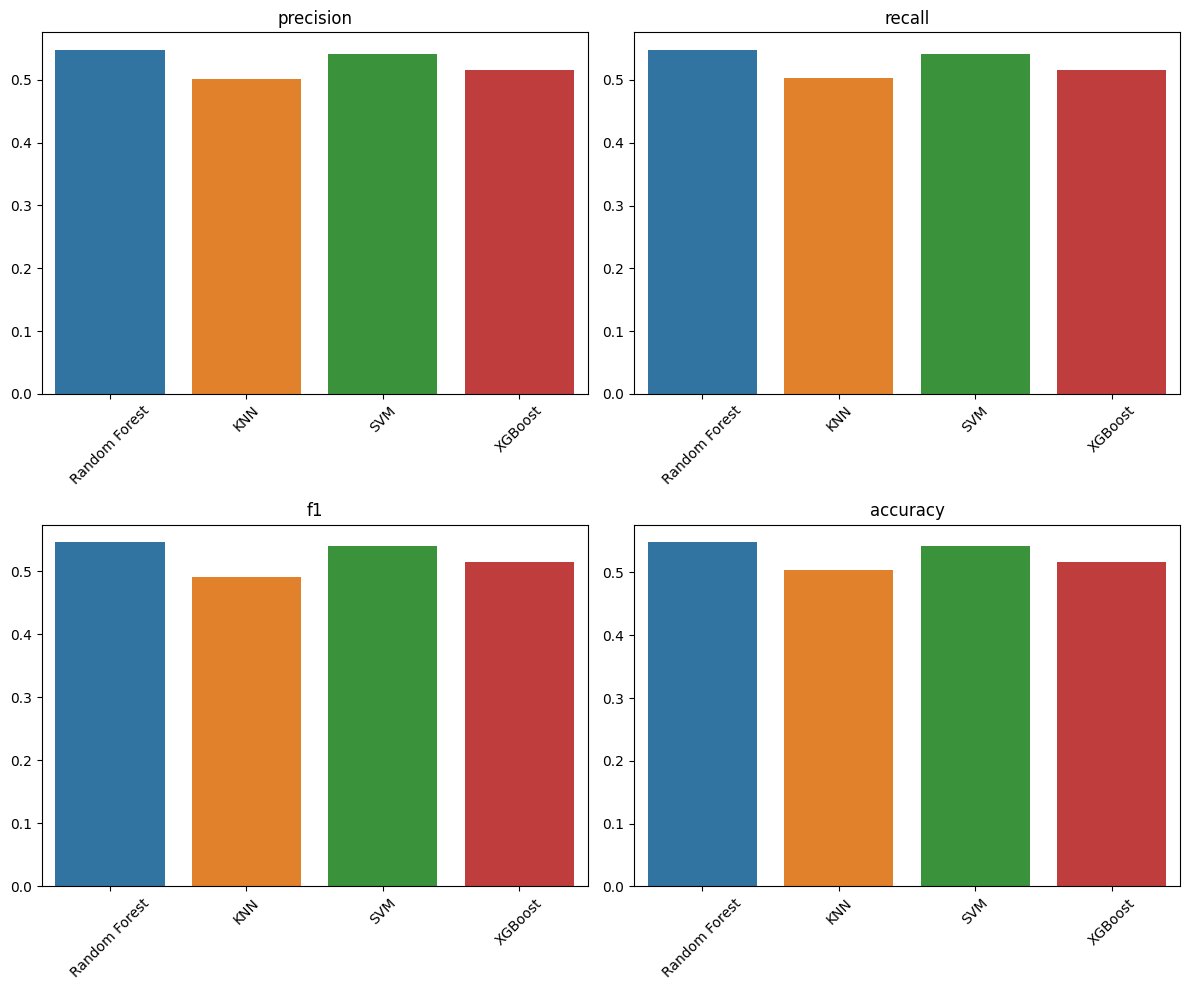

In [54]:
# Plot results
metrics = ['precision', 'recall', 'f1', 'accuracy']
plt.figure(figsize=(12, 10))
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)
    sns.barplot(x=list(results.keys()), y=[result[metric] for result in results.values()])
    plt.xticks(rotation=45)
    plt.title(metric)
plt.tight_layout()
plt.show()

### Interpretation:

The key steps involved in developing the models were as follows:
1. Encode the outcome variable to make it binary. This allows it to be compatible with sklearn functions for training and evaluation.
2. Perform a train-test split using a 80-20 split. This will be used to train and later evaluate the models being developed.
3. Standard scale the numeric data in our DataFrame. This will have a decided impact on the performance of our models since they may be impacted by the greatly differing scales of our features. Scaling the data ensures that we have stable and high performance models.
4. Use GridSearchCV to tune the hyperparameters of our models. For this we set up param grids for each model and iterate over them all to determine the best set of hyperparameters for each model.
5. The models being considered are - Random Forest, K-Nearest Neighbors, Support Vector Classifier, and XGBoost. 
6. Based on metrics such as precision, recall, and F1, the performance of the models from highest to lowest is - Random Forest > SVM >XGBoost >KNN. We can see that Random Forest performs the best whereas KNN gives the least performance. This speaks to the structures within our data which led to a model like KNN providing the lowest performance. 
7. The best hyperparameters for each model are printed to allow readers to recreate our results if desired.